# Analyzing simulation data

In [1]:
%load_ext autoreload
%autoreload 2
from simulation_results import *

## Testing Experiment class

In [2]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/linneu/ssh_simulations/ssh1/periodic_100_6561"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [3]:
experiment.print_train_val_test()

% train:  0.08474317939338516
% val:  0.7620789513793629
% test:  0.15317786922725193
% train + val + test:  1.0


number of train hamiltonians:  556
number of val hamiltonians:  5000
number of test hamiltonians:  1005
total number of hamiltonians:  6561


#### Viewing dataset summary

In [4]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.507919
1    0.492081
Name: phase, dtype: float64


total train/val phases: 
0    2822
1    2734
Name: phase, dtype: int64


Summary of test data

% test phases: 
1    0.552133
0    0.447867
Name: phase, dtype: float64


total test phases: 
1    466
0    378
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
1    0.5
0    0.5
Name: phase, dtype: float64


total phases: 
1    3200
0    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [5]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,0,test
1,0,999,0,test
2,0,999,0,test
3,0,999,0,test
4,0,999,0,test


#### Vieweng Hamiltonian summary

In [6]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.66,0.34,999,0
1,-2.0,-1.95,test,0.79,0.21,0,0
2,-2.0,-1.90,test,0.82,0.18,0,0
3,-2.0,-1.85,test,0.86,0.14,0,0
4,-2.0,-1.80,test,0.89,0.11,0,0


#### Viewing accuracy

In [7]:
experiment.accuracy

{'eigenvector_train': 0.9829496402877698,
 'eigenvector_val': 0.963464,
 'eigenvector_test': 0.7753909952606635,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9158767772511849}

#### Visualizing train/val/test splits with scatter plot

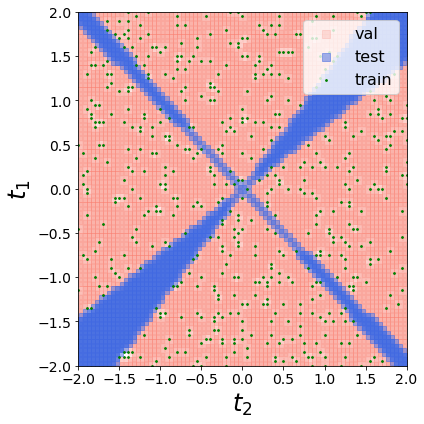

In [10]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

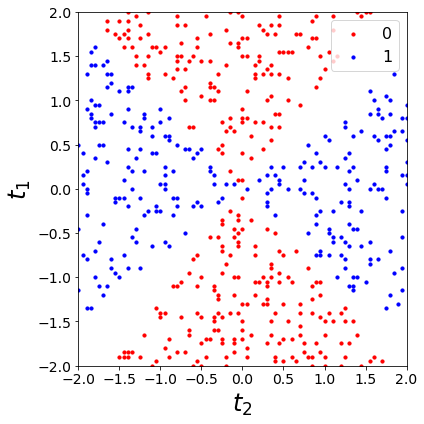

In [11]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

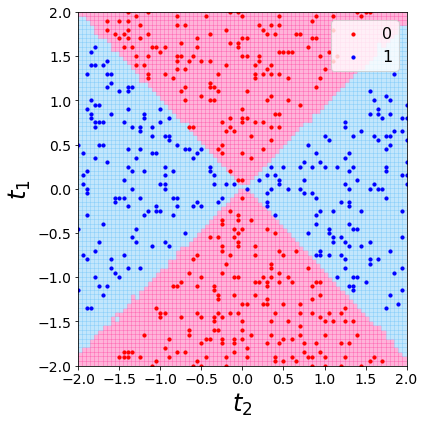

In [26]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

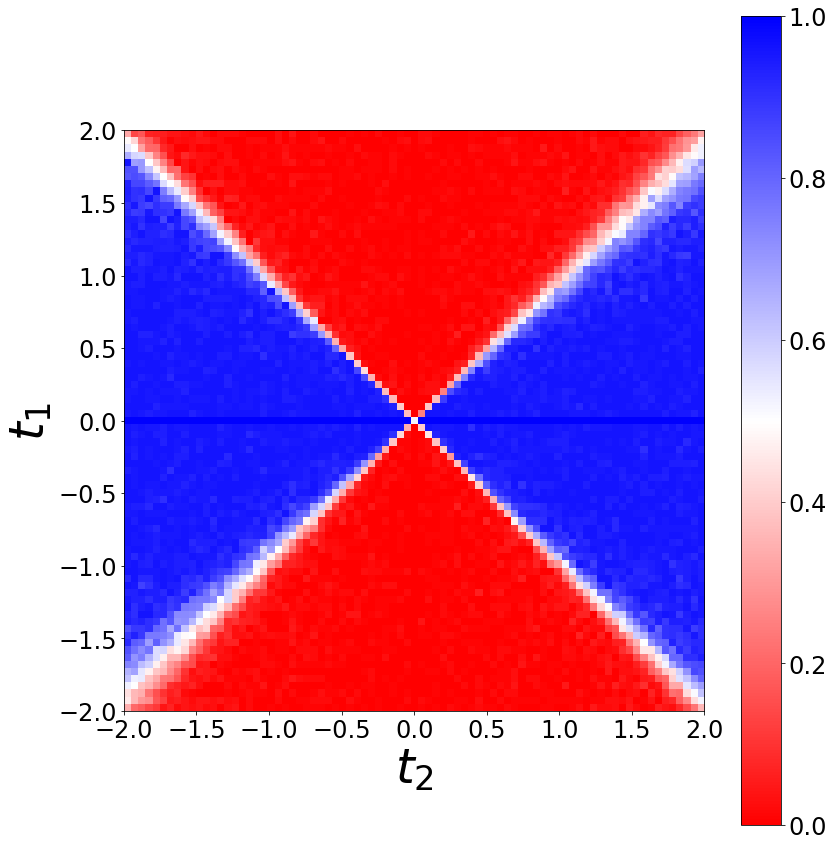

In [27]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [28]:
simulation_dir = "/home/linneu/ssh_simulations/ssh1/periodic_100_6561"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [29]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 43887.23it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


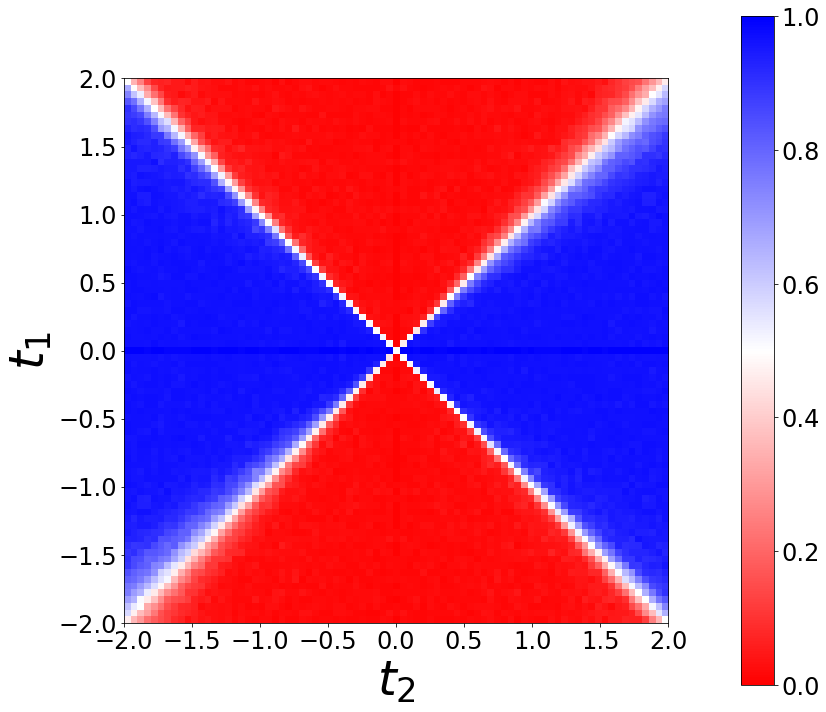

In [30]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [31]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:18<00:00,  5.41it/s]


{'eigenvector_train': 0.9815586330935253,
 'eigenvector_val': 0.96410856,
 'eigenvector_test': 0.7881368483412323,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.990568720379147}

#### Computing bootstrap accuracies

In [32]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0, 'hamiltonian_val': 1.0, 'hamiltonian_test': 1.0}

#### Computing mean feature importances

In [33]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ")
print("\n")
print(sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 1467.65it/s]

Sorted feature importances: 


[(0, 0.16899985193976078), (50, 0.16027277610525203), (51, 0.11079281443086275), (3, 0.0926629612204455), (1, 0.08824562429981071), (53, 0.07988250298048015), (99, 0.015836938014481734), (49, 0.01484315641985572), (2, 0.010822260392078063), (55, 0.008957866126319576), (95, 0.008414674068438486), (98, 0.008057135310372296), (5, 0.007792252406353874), (52, 0.007385587848317109), (7, 0.006623515418571701), (45, 0.006607713818302485), (48, 0.006293213602415334), (19, 0.005933081765279274), (57, 0.005882264224216421), (35, 0.005479889010246498), (69, 0.0054570355907490676), (27, 0.00447417649531073), (85, 0.004458557210976204), (4, 0.00420143796180483), (77, 0.00413570155842476), (61, 0.003994790525128792), (63, 0.0038759003092861083), (59, 0.0036996333790794197), (54, 0.0036347993094256216), (47, 0.0036234625816597755), (71, 0.003603795735903073), (79, 0.0035808150644768126), (11, 0.0034640557819812174), (91, 0.0033132048040646726), (87, 0.003107792473377982)

#### Plotting feature importances

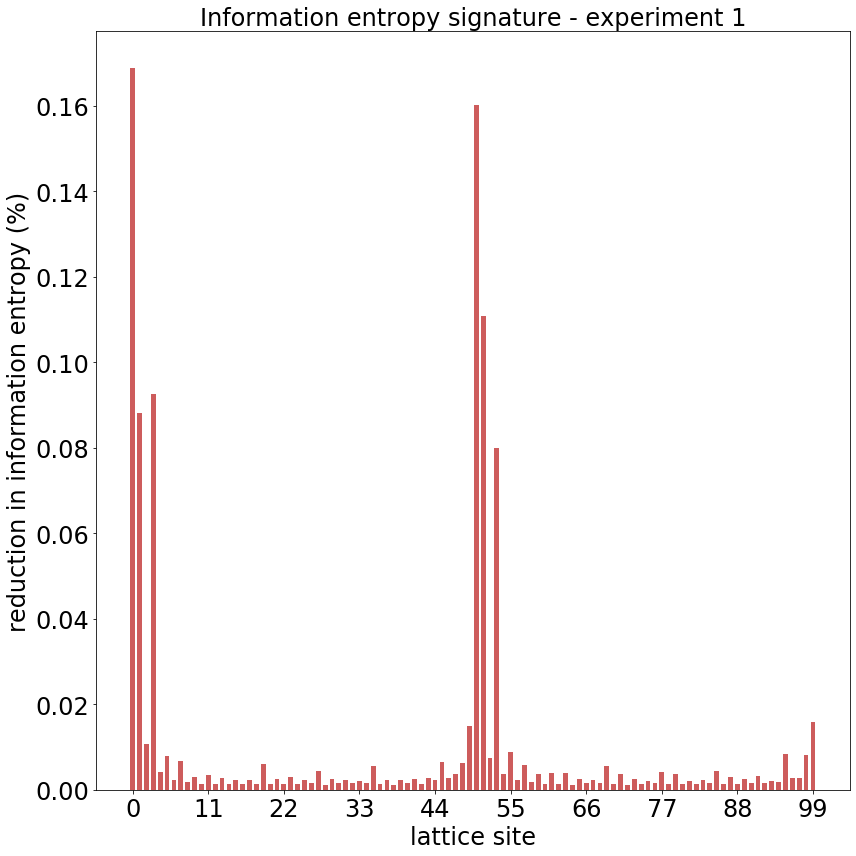

In [34]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

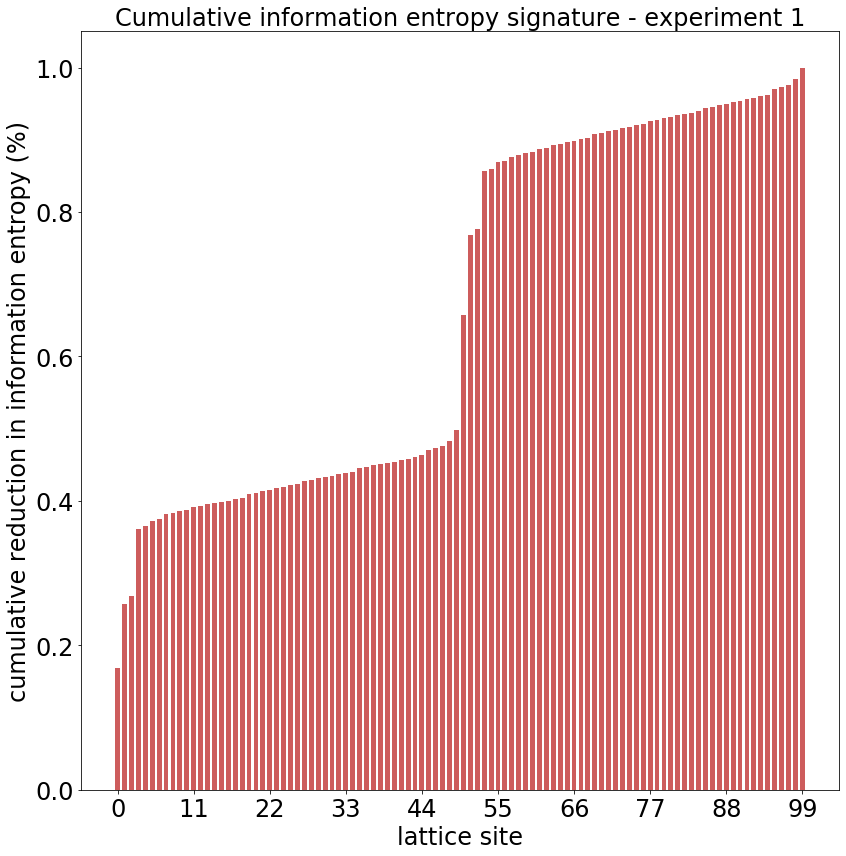

In [35]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/linneu/ml_topological_phases_in_real_space/paper/ssh1/periodic_100_6561/cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features 0,50

We now rerun the simulations using the most relevant features only

In [25]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 354 µs, sys: 12 µs, total: 366 µs
Wall time: 243 µs


In [38]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_50.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50_feat_0_50"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [0,50]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 7.31 s, sys: 368 ms, total: 7.68 s
Wall time: 7.27 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000


### Running simulation

In [39]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [04:00<00:00,  2.40s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.001204,-0.016530,...,-0.134123,-0.138686,-0.118757,-0.127445,-0.095929,-0.108196,-0.067073,-0.082149,-0.034003,-0.050940
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.141421,-0.138980,...,0.043375,0.067830,-0.009222,0.017385,-0.060524,-0.035502,-0.103326,-0.083403,-0.131616,-0.119589
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.000826,0.025688,...,0.134753,0.124324,0.141088,0.140407,0.127608,0.136771,0.096206,0.113925,0.051292,0.075079
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141417,0.136684,...,-0.115093,-0.131915,-0.061266,-0.091040,0.007717,-0.027643,0.074791,0.042592,0.123363,0.102291
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.001302,0.036430,...,0.082068,0.050848,0.127402,0.108132,0.141218,0.138667,0.120099,0.134896,0.069268,0.097755


#### Loading simulation

In [40]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50_feat_0_50"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [41]:
simulation.n_experiments

100

In [42]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 124741.41it/s]


#### Computing mean accuracies with less features

In [43]:
simulation.n_experiments

100

In [44]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:16<00:00,  6.12it/s]


{'eigenvector_train': 0.7161692446043165,
 'eigenvector_val': 0.5460661200000001,
 'eigenvector_test': 0.5220411137440759,
 'hamiltonian_train': 0.8816726618705034,
 'hamiltonian_val': 0.5535520000000002,
 'hamiltonian_test': 0.5099052132701423}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


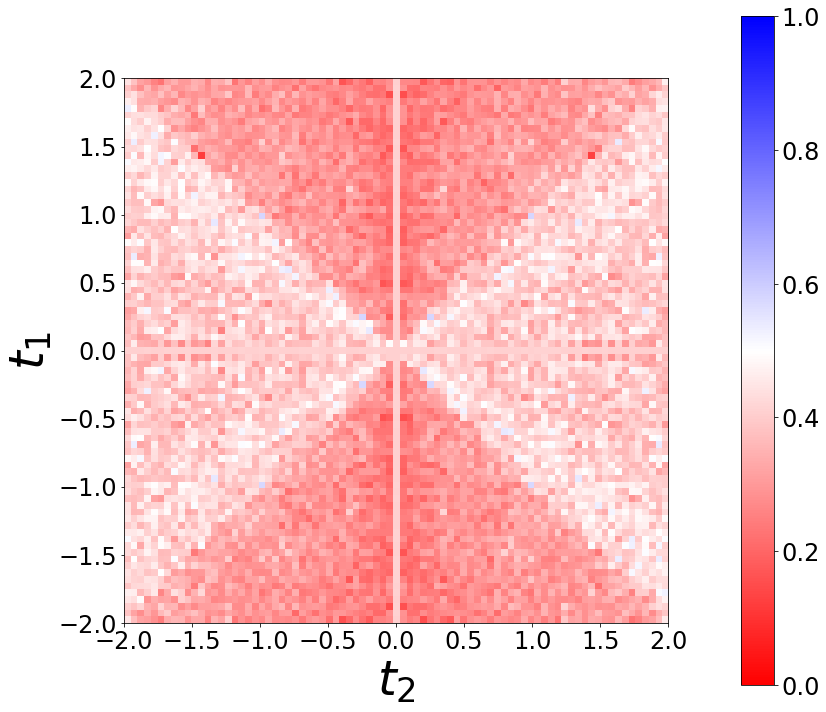

In [45]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_feat_0_50_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features 0,51

In [46]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_50.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50_feat_0_51"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [0,51]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 7.69 s, sys: 448 ms, total: 8.14 s
Wall time: 7.59 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000


In [47]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [04:11<00:00,  2.50s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.001204,-0.016530,...,-0.134123,-0.138686,-0.118757,-0.127445,-0.095929,-0.108196,-0.067073,-0.082149,-0.034003,-0.050940
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.141421,-0.138980,...,0.043375,0.067830,-0.009222,0.017385,-0.060524,-0.035502,-0.103326,-0.083403,-0.131616,-0.119589
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,-0.000826,0.025688,...,0.134753,0.124324,0.141088,0.140407,0.127608,0.136771,0.096206,0.113925,0.051292,0.075079
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141417,0.136684,...,-0.115093,-0.131915,-0.061266,-0.091040,0.007717,-0.027643,0.074791,0.042592,0.123363,0.102291
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.001302,0.036430,...,0.082068,0.050848,0.127402,0.108132,0.141218,0.138667,0.120099,0.134896,0.069268,0.097755


#### Loading simulation

In [48]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50_feat_0_51"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [49]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 135059.08it/s]


#### Computing mean accuracies with less features

In [50]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  5.76it/s]


{'eigenvector_train': 0.9647196043165468,
 'eigenvector_val': 0.6893315399999999,
 'eigenvector_test': 0.567285308056872,
 'hamiltonian_train': 0.9879496402877699,
 'hamiltonian_val': 0.945696,
 'hamiltonian_test': 0.6408649289099526}

#### Plotting heatmap for less features 0,51

Skipping winding 0
Plotting winding 1


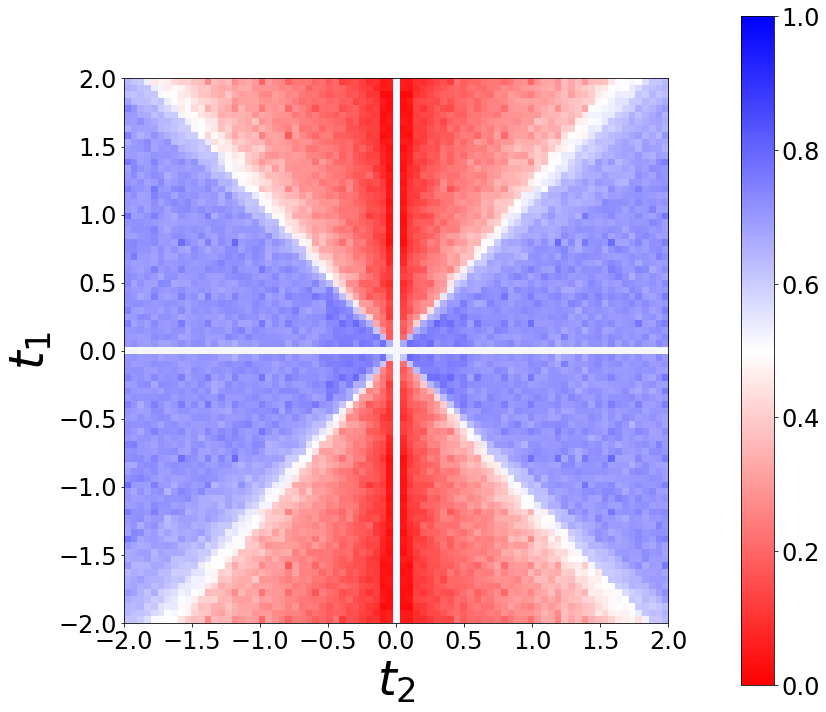

In [51]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_feat_0_51_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features

In [52]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_50.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50_random_feat"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 7.31 s, sys: 380 ms, total: 7.69 s
Wall time: 7.28 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,666,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000


#### Running simulation

In [53]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [94 38]


running experiments:   1%|          | 1/100 [00:03<05:02,  3.06s/it]

random_features:  [94 12]


running experiments:   2%|▏         | 2/100 [00:06<05:00,  3.07s/it]

random_features:  [71 68]


running experiments:   3%|▎         | 3/100 [00:08<04:40,  2.89s/it]

random_features:  [82 61]


running experiments:   4%|▍         | 4/100 [00:11<04:29,  2.81s/it]

random_features:  [ 1 29]


running experiments:   5%|▌         | 5/100 [00:13<04:20,  2.75s/it]

random_features:  [93 56]


running experiments:   6%|▌         | 6/100 [00:16<04:16,  2.72s/it]

random_features:  [91 33]


running experiments:   7%|▋         | 7/100 [00:18<04:05,  2.64s/it]

random_features:  [ 2 75]


running experiments:   8%|▊         | 8/100 [00:21<03:56,  2.57s/it]

random_features:  [56  0]


running experiments:   9%|▉         | 9/100 [00:23<03:53,  2.56s/it]

random_features:  [ 3 72]


running experiments:  10%|█         | 10/100 [00:26<03:47,  2.53s/it]

random_features:  [24 38]


running experiments:  11%|█         | 11/100 [00:29<03:53,  2.63s/it]

random_features:  [ 2 32]


running experiments:  12%|█▏        | 12/100 [00:32<03:59,  2.72s/it]

random_features:  [61 38]


running experiments:  13%|█▎        | 13/100 [00:34<03:48,  2.63s/it]

random_features:  [40 31]


running experiments:  14%|█▍        | 14/100 [00:36<03:40,  2.57s/it]

random_features:  [ 3 98]


running experiments:  15%|█▌        | 15/100 [00:39<03:33,  2.52s/it]

random_features:  [ 1 58]


running experiments:  16%|█▌        | 16/100 [00:41<03:28,  2.48s/it]

random_features:  [35 60]


running experiments:  17%|█▋        | 17/100 [00:44<03:26,  2.49s/it]

random_features:  [ 8 56]


running experiments:  18%|█▊        | 18/100 [00:47<03:37,  2.65s/it]

random_features:  [ 0 34]


running experiments:  19%|█▉        | 19/100 [00:50<03:35,  2.66s/it]

random_features:  [69 45]


running experiments:  20%|██        | 20/100 [00:52<03:28,  2.60s/it]

random_features:  [41 75]


running experiments:  21%|██        | 21/100 [00:54<03:21,  2.55s/it]

random_features:  [92  9]


running experiments:  22%|██▏       | 22/100 [00:57<03:14,  2.50s/it]

random_features:  [24 42]


running experiments:  23%|██▎       | 23/100 [01:00<03:24,  2.66s/it]

random_features:  [88 72]


running experiments:  24%|██▍       | 24/100 [01:03<03:25,  2.71s/it]

random_features:  [85 44]


running experiments:  25%|██▌       | 25/100 [01:05<03:17,  2.63s/it]

random_features:  [66 83]


running experiments:  26%|██▌       | 26/100 [01:08<03:16,  2.66s/it]

random_features:  [ 9 37]


running experiments:  27%|██▋       | 27/100 [01:10<03:08,  2.59s/it]

random_features:  [57 19]


running experiments:  28%|██▊       | 28/100 [01:13<03:03,  2.55s/it]

random_features:  [35 16]


running experiments:  29%|██▉       | 29/100 [01:15<02:57,  2.50s/it]

random_features:  [34 65]


running experiments:  30%|███       | 30/100 [01:17<02:52,  2.46s/it]

random_features:  [98 64]


running experiments:  31%|███       | 31/100 [01:20<02:57,  2.57s/it]

random_features:  [67 88]


running experiments:  32%|███▏      | 32/100 [01:23<02:51,  2.52s/it]

random_features:  [ 7 78]


running experiments:  33%|███▎      | 33/100 [01:25<02:45,  2.47s/it]

random_features:  [92 16]


running experiments:  34%|███▍      | 34/100 [01:28<02:51,  2.61s/it]

random_features:  [48 97]


running experiments:  35%|███▌      | 35/100 [01:30<02:44,  2.53s/it]

random_features:  [92  3]


running experiments:  36%|███▌      | 36/100 [01:33<02:39,  2.49s/it]

random_features:  [18  1]


running experiments:  37%|███▋      | 37/100 [01:35<02:34,  2.45s/it]

random_features:  [ 5 83]


running experiments:  38%|███▊      | 38/100 [01:37<02:31,  2.44s/it]

random_features:  [58 44]


running experiments:  39%|███▉      | 39/100 [01:40<02:36,  2.57s/it]

random_features:  [89 38]


running experiments:  40%|████      | 40/100 [01:43<02:30,  2.50s/it]

random_features:  [67 29]


running experiments:  41%|████      | 41/100 [01:45<02:25,  2.47s/it]

random_features:  [43 67]


running experiments:  42%|████▏     | 42/100 [01:47<02:21,  2.45s/it]

random_features:  [59 33]


running experiments:  43%|████▎     | 43/100 [01:50<02:18,  2.44s/it]

random_features:  [16  9]


running experiments:  44%|████▍     | 44/100 [01:52<02:15,  2.41s/it]

random_features:  [30 49]


running experiments:  45%|████▌     | 45/100 [01:55<02:12,  2.41s/it]

random_features:  [70 60]


running experiments:  46%|████▌     | 46/100 [01:57<02:11,  2.44s/it]

random_features:  [91 53]


running experiments:  47%|████▋     | 47/100 [02:00<02:09,  2.44s/it]

random_features:  [26 15]


running experiments:  48%|████▊     | 48/100 [02:02<02:07,  2.45s/it]

random_features:  [29 17]


running experiments:  49%|████▉     | 49/100 [02:05<02:08,  2.52s/it]

random_features:  [97 33]


running experiments:  50%|█████     | 50/100 [02:07<02:03,  2.48s/it]

random_features:  [69 57]


running experiments:  51%|█████     | 51/100 [02:10<02:02,  2.51s/it]

random_features:  [96 50]


running experiments:  52%|█████▏    | 52/100 [02:12<02:01,  2.52s/it]

random_features:  [49 43]


running experiments:  53%|█████▎    | 53/100 [02:15<01:57,  2.51s/it]

random_features:  [32 64]


running experiments:  54%|█████▍    | 54/100 [02:17<01:58,  2.58s/it]

random_features:  [70 64]


running experiments:  55%|█████▌    | 55/100 [02:20<01:55,  2.57s/it]

random_features:  [80 35]


running experiments:  56%|█████▌    | 56/100 [02:22<01:51,  2.52s/it]

random_features:  [ 0 43]


running experiments:  57%|█████▋    | 57/100 [02:25<01:47,  2.50s/it]

random_features:  [64 82]


running experiments:  58%|█████▊    | 58/100 [02:28<01:49,  2.61s/it]

random_features:  [38  4]


running experiments:  59%|█████▉    | 59/100 [02:31<01:52,  2.74s/it]

random_features:  [58 20]


running experiments:  60%|██████    | 60/100 [02:33<01:46,  2.66s/it]

random_features:  [47  5]


running experiments:  61%|██████    | 61/100 [02:36<01:40,  2.58s/it]

random_features:  [ 1 30]


running experiments:  62%|██████▏   | 62/100 [02:38<01:36,  2.53s/it]

random_features:  [80 27]


running experiments:  63%|██████▎   | 63/100 [02:41<01:33,  2.54s/it]

random_features:  [54 85]


running experiments:  64%|██████▍   | 64/100 [02:43<01:29,  2.49s/it]

random_features:  [91 45]


running experiments:  65%|██████▌   | 65/100 [02:45<01:25,  2.46s/it]

random_features:  [53 35]


running experiments:  66%|██████▌   | 66/100 [02:48<01:22,  2.44s/it]

random_features:  [90 59]


running experiments:  67%|██████▋   | 67/100 [02:50<01:20,  2.44s/it]

random_features:  [72 87]


running experiments:  68%|██████▊   | 68/100 [02:53<01:17,  2.41s/it]

random_features:  [73 90]


running experiments:  69%|██████▉   | 69/100 [02:55<01:14,  2.40s/it]

random_features:  [71 97]


running experiments:  70%|███████   | 70/100 [02:57<01:12,  2.40s/it]

random_features:  [ 3 93]


running experiments:  71%|███████   | 71/100 [03:00<01:10,  2.43s/it]

random_features:  [ 8 71]


running experiments:  72%|███████▏  | 72/100 [03:02<01:08,  2.43s/it]

random_features:  [89 58]


running experiments:  73%|███████▎  | 73/100 [03:05<01:05,  2.42s/it]

random_features:  [41 41]


running experiments:  74%|███████▍  | 74/100 [03:07<01:03,  2.45s/it]

random_features:  [59 91]


running experiments:  75%|███████▌  | 75/100 [03:10<01:00,  2.43s/it]

random_features:  [67 87]


running experiments:  76%|███████▌  | 76/100 [03:12<00:59,  2.48s/it]

random_features:  [40 66]


running experiments:  77%|███████▋  | 77/100 [03:15<00:57,  2.49s/it]

random_features:  [62 43]


running experiments:  78%|███████▊  | 78/100 [03:17<00:54,  2.47s/it]

random_features:  [37 11]


running experiments:  79%|███████▉  | 79/100 [03:20<00:51,  2.45s/it]

random_features:  [41 16]


running experiments:  80%|████████  | 80/100 [03:22<00:48,  2.41s/it]

random_features:  [68 79]


running experiments:  81%|████████  | 81/100 [03:24<00:45,  2.39s/it]

random_features:  [ 1 48]


running experiments:  82%|████████▏ | 82/100 [03:27<00:42,  2.39s/it]

random_features:  [92 61]


running experiments:  83%|████████▎ | 83/100 [03:29<00:40,  2.37s/it]

random_features:  [58 57]


running experiments:  84%|████████▍ | 84/100 [03:31<00:37,  2.37s/it]

random_features:  [84 46]


running experiments:  85%|████████▌ | 85/100 [03:34<00:37,  2.51s/it]

random_features:  [91 75]


running experiments:  86%|████████▌ | 86/100 [03:37<00:34,  2.49s/it]

random_features:  [87 80]


running experiments:  87%|████████▋ | 87/100 [03:39<00:32,  2.48s/it]

random_features:  [29 61]


running experiments:  88%|████████▊ | 88/100 [03:41<00:29,  2.45s/it]

random_features:  [59 46]


running experiments:  89%|████████▉ | 89/100 [03:44<00:26,  2.43s/it]

random_features:  [43 42]


running experiments:  90%|█████████ | 90/100 [03:46<00:23,  2.39s/it]

random_features:  [63 87]


running experiments:  91%|█████████ | 91/100 [03:48<00:21,  2.38s/it]

random_features:  [60 47]


running experiments:  92%|█████████▏| 92/100 [03:51<00:19,  2.42s/it]

random_features:  [43 98]


running experiments:  93%|█████████▎| 93/100 [03:53<00:16,  2.39s/it]

random_features:  [93 21]


running experiments:  94%|█████████▍| 94/100 [03:56<00:14,  2.39s/it]

random_features:  [41 17]


running experiments:  95%|█████████▌| 95/100 [03:58<00:11,  2.38s/it]

random_features:  [25  7]


running experiments:  96%|█████████▌| 96/100 [04:00<00:09,  2.38s/it]

random_features:  [17 65]


running experiments:  97%|█████████▋| 97/100 [04:03<00:07,  2.40s/it]

random_features:  [68  8]


running experiments:  98%|█████████▊| 98/100 [04:06<00:04,  2.49s/it]

random_features:  [33 30]


running experiments:  99%|█████████▉| 99/100 [04:08<00:02,  2.47s/it]

random_features:  [86 37]


running experiments: 100%|██████████| 100/100 [04:10<00:00,  2.43s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.141421,0.141142,...,0.114412,0.108967,0.123928,0.119406,0.131490,0.127962,0.136978,0.134500,0.140306,0.138916
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.141421,0.140306,...,0.043702,0.026500,0.075777,0.060214,0.103092,0.090145,0.123928,0.114412,0.136978,0.131490
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,-0.100000,0.100000,...,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000,-0.100000,0.100000
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,0,test,0.000509,-0.008372,...,-0.082713,-0.089753,-0.067684,-0.075347,-0.051587,-0.059753,-0.034677,-0.043217,-0.017220,-0.026000
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.001204,-0.016530,...,-0.134123,-0.138686,-0.118757,-0.127445,-0.095929,-0.108196,-0.067073,-0.082149,-0.034003,-0.050940
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,-0.141421,-0.138980,...,0.043375,0.067830,-0.009222,0.017385,-0.060524,-0.035502,-0.103326,-0.083403,-0.131616,-0.119589
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,-0.000826,0.025688,...,0.134753,0.124324,0.141088,0.140407,0.127608,0.136771,0.096206,0.113925,0.051292,0.075079
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.141417,0.136684,...,-0.115093,-0.131915,-0.061266,-0.091040,0.007717,-0.027643,0.074791,0.042592,0.123363,0.102291
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,999,1,test,0.001302,0.036430,...,0.082068,0.050848,0.127402,0.108132,0.141218,0.138667,0.120099,0.134896,0.069268,0.097755


#### Loading simulation with random features

In [54]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_50_random_feat"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary for simulation with random features

In [55]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 99534.24it/s]


#### Computing mean accuracies for simulation with random features

In [56]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  5.65it/s]


{'eigenvector_train': 0.9548665467625898,
 'eigenvector_val': 0.67238236,
 'eigenvector_test': 0.5455681279620853,
 'hamiltonian_train': 0.9885791366906475,
 'hamiltonian_val': 0.8867340000000001,
 'hamiltonian_test': 0.6448104265402843}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


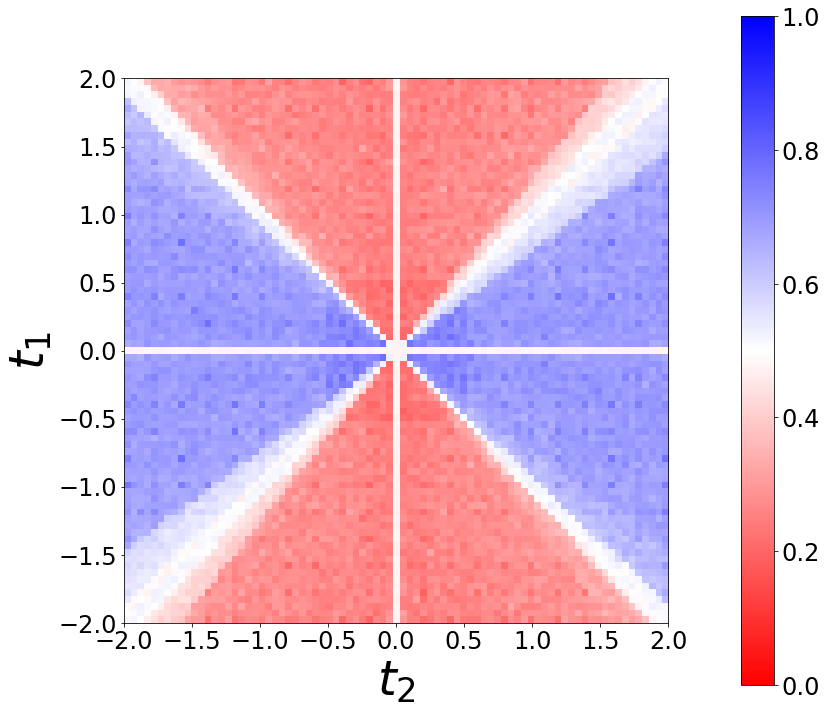

In [57]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_50_random_feat_2_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)